In [1]:
! pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

import os
import re
import string
import nltk
import unicodedata
import html

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
stop_words = stopwords.words('english')

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
from google.colab import files
uploaded = files.upload()           # Upload [amazon_reviews.csv]

Saving amazon_reviews.csv to amazon_reviews.csv


In [7]:
df = pd.read_csv("amazon_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


# `1.` Text Preprocessing

In [9]:
# pre-processing دي كده فانكشن كبيره بتعملي كل اللي انا عاملته فوق كله يعني بتعملي كل ال
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def to_lowercase(text):
    return text.lower()


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def text2words(text):
    return word_tokenize(text)


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])


def normalize_text(text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    text = remove_whitespaces(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words) 

In [10]:
df['reviewText'] = df['reviewText'].apply(lambda x: normalize_text(x) if (type(x) == str) else np.nan)
df['reviewText']

0                                                   issue
1       purchase device work advertise never much phon...
2       work expect spring higher capacity think make ...
3       think work greathad diff bran gb card go south...
4       buy retail package arrive legit orange envelop...
                              ...                        
4910    buy sandisk gb class use htc inspire month get...
4911    use extend capability samsung galaxy note grea...
4912    great card fast reliable come optional adapter...
4913           good amount space stuff want fit gopro say
4914    ive hear bad thing gb micro sd card crap week ...
Name: reviewText, Length: 4915, dtype: object

In [11]:
df.isna().sum()

reviewerID        0
asin              0
reviewerName      1
helpful           0
reviewText        1
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

In [12]:
df.dropna(inplace= True)

In [13]:
df.isna().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
day_diff          0
helpful_yes       0
total_vote        0
dtype: int64

# `2.` Text Visualization

In [14]:
# Get Term Frequency [TF]:

tf = df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]             # make columns names ["words", "tf"]
tf.head()

,words,tf
0,purchase,540.00
1,device,584.00
2,work,2774.00
3,advertise,121.00
4,never,358.00


In [15]:
tf.shape

(7947, 2)

In [16]:
tf["words"].nunique()             # nunique --> number of unique values in ['words'] column

7947

In [17]:
tf["tf"].describe()

count   7947.00
mean      15.69
std      103.94
min        1.00
25%        1.00
50%        1.00
75%        4.00
max     5537.00
Name: tf, dtype: float64

In [18]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

count   7947.00
mean      15.69
std      103.94
min        1.00
5%         1.00
10%        1.00
25%        1.00
50%        1.00
75%        4.00
80%        5.00
90%       18.00
95%       52.00
99%      273.18
max     5537.00
Name: tf, dtype: float64

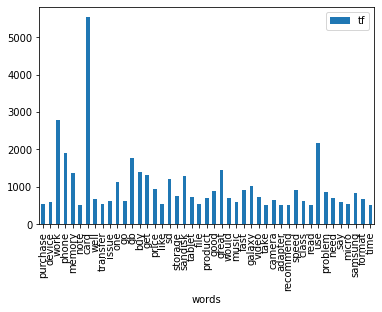

In [19]:
# Get terms frequency which it's reduncies > than 500
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

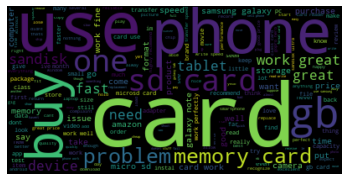

In [20]:
# Wordcloud

text = " ".join(i for i in df.reviewText)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

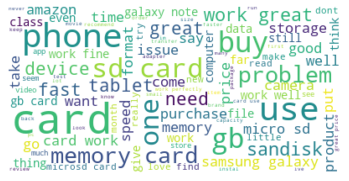

In [21]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

# `3.` Sentiment Analysis

In [22]:
# NLTK already has a built-in, pretrained sentiment analyzer
# called VADER (Valence Aware Dictionary and Sentiment Reasoner).

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchase device work advertise never much phon...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expect spring higher capacity think make ...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think work greathad diff bran gb card go south...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",buy retail package arrive legit orange envelop...,5.00,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else suppose purc...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0


In [23]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

SIA.polarity_scores("The film was awesome")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [24]:
SIA.polarity_scores("I liked this music but it is not good as the other one")

{'compound': -0.298, 'neg': 0.207, 'neu': 0.666, 'pos': 0.127}

### `neg` --> الجمله دي سلبيه بدرجه كذا وقيمتها بتتراوح من 0 ل 1
### `pos` --> الجمله دي ايجابيه بدرجه كذا وقيمتها بتتراوح من 0 ل 1
### `neu` --> الجمله دي متعادله بنسبه كذا وقيمتها بتتراوح من 0 ل 1
##### `compound` --> التقييم النهائي للجمله قيمتها بتتراوح من -1 ل 1   فلو قيمتها طلعت ب -1 يبقي الجمله دي سلبيه جدا ولو 1 يبقي الجمله دي ايجابيه جدا ولو 0 يبقي الجمله دي متعادله وهكذا

In [25]:
# Get [neg, pos, neu, compound] polarity_scores for only 10 reviews in the dataframe:
df["reviewText"][0:10].apply(lambda x: SIA.polarity_scores(x))

1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...
3     {'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...
4     {'neg': 0.0, 'neu': 0.765, 'pos': 0.235, 'comp...
5     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6     {'neg': 0.098, 'neu': 0.587, 'pos': 0.315, 'co...
7     {'neg': 0.066, 'neu': 0.703, 'pos': 0.231, 'co...
8     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9     {'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'comp...
10    {'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp...
Name: reviewText, dtype: object

In [26]:
# Get only [compound] polarity_scores for only 10 reviews in the dataframe:
df["reviewText"][0:10].apply(lambda x: SIA.polarity_scores(x)["compound"])

1    0.00
2    0.40
3    0.65
4    0.86
5    0.00
6    0.90
7    0.82
8    0.00
9    0.92
10   0.94
Name: reviewText, dtype: float64

In [27]:
# Create new column called [polarity_score] which get [compound] polarity_scores for every reviews in the dataframe: 
df["polarity_score"] = df["reviewText"].apply(lambda x: SIA.polarity_scores(x)["compound"])
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchase device work advertise never much phon...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expect spring higher capacity think make ...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think work greathad diff bran gb card go south...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",buy retail package arrive legit orange envelop...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else suppose purc...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00


# `4.` Sentiment Modeling

In [28]:
# Feature Engineering

# Create Targrt Table:
df["sentiment_label"] = df["reviewText"].apply(lambda x: "pos" if SIA.polarity_scores(x)["compound"] > 0 else "neg")
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchase device work advertise never much phon...,5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.00,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",work expect spring higher capacity think make ...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0,0.40,pos
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think work greathad diff bran gb card go south...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.65,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",buy retail package arrive legit orange envelop...,5.00,best deal around,1373673600,2013-07-13,513,0,0,0.86,pos
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",mini storage doesnt anything else suppose purc...,5.00,Not a lot to really be said,1367193600,2013-04-29,588,0,0,0.00,neg
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",phone never skip beat file transfer speedy cor...,5.00,Works well,1382140800,2013-10-19,415,0,0,0.90,pos
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",hard believe affordable digital become gb devi...,5.00,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0,0.82,pos
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",work htc rezound run short space gb sandisk or...,5.00,Loads of room,1395619200,2014-03-24,259,1,1,0.00,neg
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]",galaxy super fast card totally happy happy sti...,5.00,works great,1381449600,2013-11-10,393,0,0,0.92,pos
10,A1RTQROTWR5NCB,B007WTAJTO,808TREX50,"[0, 0]",like sd card take music video download persona...,5.00,32GB MicroSD Card.,1368230400,2013-11-05,398,0,0,0.94,pos


In [29]:
df["sentiment_label"].value_counts()

pos    3944
neg     969
Name: sentiment_label, dtype: int64

In [30]:
# one more question, what I'm wondering is, is there any difference between the neg-pos labels in terms of the given points?
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg   4.06
pos   4.72
Name: overall, dtype: float64

In [31]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

X = df["reviewText"]
y = df["sentiment_label"]

In [32]:
# ngram
a = " I liked this music but it is not good as the other one "

TextBlob(a).ngrams(2)

[WordList(['I', 'liked']),
 WordList(['liked', 'this']),
 WordList(['this', 'music']),
 WordList(['music', 'but']),
 WordList(['but', 'it']),
 WordList(['it', 'is']),
 WordList(['is', 'not']),
 WordList(['not', 'good']),
 WordList(['good', 'as']),
 WordList(['as', 'the']),
 WordList(['the', 'other']),
 WordList(['other', 'one'])]

In [33]:
# Count Vectors

from sklearn.feature_extraction.text import CountVectorizer

corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [34]:
# n-gram frekans

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names()
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]])

In [35]:
# Application to data:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# TF-IDF

In [36]:
# word tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')
X_w = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_w.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

In [37]:
# n-gram tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_n = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()
X_n.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.37102749,
        0.30037873, 0.47060133, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37102749, 0.37102749, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37102749, 0.37102749, 0.        , 0.        ],
       [0.        , 0.        , 0.34488069, 0.34488069, 0.        ,
        0.22013288, 0.        , 0.34488069, 0.        , 0.        ,
        0.        , 0.34488069, 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.34488069,
        0.34488069, 0.        , 0.        , 0.        , 0.        ],
       [0.36153669, 0.36153669, 0.        , 0.        , 0.        ,
        0.23076418, 0.        , 0.        , 0.36153669, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36153669, 0.36153669, 0.36153669, 0.        ,
        0.        , 0.28503968, 0.28503968, 0.

In [38]:
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

# `5.` Modeling

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_tf_idf_word, y)

cross_val_score(log_model, X_tf_idf_word, y, scoring="accuracy", cv=5).mean()

yeni_yorum1 = pd.Series("this product is great")
yeni_yorum2 = pd.Series("look at that shit very bad")
yeni_yorum3 = pd.Series("it was good but I am sure that it fits me")

C_V = CountVectorizer()
model= C_V.fit(X)
after_transform= model.transform(yeni_yorum1)
log_model.predict(after_transform)

array([1])

In [40]:
C_V = CountVectorizer()
model= C_V.fit(X)
after_transform= model.transform(yeni_yorum2)
log_model.predict(after_transform)

array([0])

In [41]:
C_V = CountVectorizer()
model= C_V.fit(X)
after_transform= model.transform(yeni_yorum3)
log_model.predict(after_transform)

array([1])

In [42]:
# get any random review to predict it:
random_review = pd.Series(df["reviewText"].sample(1).values)          # values to convert it to array then put this array in Series
random_review

0    work like memory card work save stuff delete s...
dtype: object

In [43]:
new_comment = CountVectorizer().fit(X).transform(random_review)       # must random_review as pd.Series or Dataframe
log_model.predict(new_comment)

array([1])

## Random Forests

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_tf_idf_word, y)

cross_val_score(rf_model, X_tf_idf_word, y, scoring="accuracy", cv=5).mean()

yeni_yorum1 = pd.Series("this product is great")
yeni_yorum2 = pd.Series("look at that shit very bad")
yeni_yorum3 = pd.Series("it was good but I am sure that it fits me")

C_V = CountVectorizer()
model= C_V.fit(X)
after_transform= model.transform(yeni_yorum1)
rf_model.predict(after_transform)

array([1])

In [45]:
C_V = CountVectorizer()
model= C_V.fit(X)
after_transform= model.transform(yeni_yorum2)
rf_model.predict(after_transform)

array([0])

In [46]:
C_V = CountVectorizer()
model= C_V.fit(X)
after_transform= model.transform(yeni_yorum3)
rf_model.predict(after_transform)

array([1])

In [47]:
# get any random review to predict it:
random_review = pd.Series(df["reviewText"].sample(1).values)          # values to convert it to array then put this array in Series
random_review

0    store data good job else say something become ...
dtype: object

In [48]:
new_comment = CountVectorizer().fit(X).transform(random_review)       # must random_review as pd.Series or Dataframe
rf_model.predict(new_comment)

array([1])

In [49]:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

rf_model = RandomForestClassifier()
rf_model.fit(X_count, y)

cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8259716607997879

In [50]:
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

rf_model = RandomForestClassifier()
rf_model.fit(X_tf_idf_word, y)

cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8155907038804276

In [51]:
# COUNT-Vectorizer N-GRAM
vectorizer_ngrams = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_vectorizer_ngram = vectorizer_ngrams.fit_transform(X)

rf_model = RandomForestClassifier()
rf_model.fit(X_vectorizer_ngram, y)

cross_val_score(rf_model, X_vectorizer_ngram, y, cv=5, n_jobs=-1).mean()

0.8017509473679848

In [52]:
# TF-IDF N-GRAM
tf_idf_ngrams_word_vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_tf_idf_ngram = tf_idf_ngrams_word_vectorizer.fit_transform(X)

rf_model = RandomForestClassifier()
rf_model.fit(X_tf_idf_ngram, y)

cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

0.8029717001655434

## Grid-Search

In [53]:
# Hyperparameter Optimization

rf_model = RandomForestClassifier(random_state= 42)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True)
rf_best_grid.fit(X_count, y)

best_params= rf_best_grid.best_params_

rf_final = rf_model.set_params(**best_params, random_state= 42)
rf_final.fit(X_count, y)

cv_results = cross_validate(rf_final, X_count, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

print(rf_best_grid.best_params_)
print(rf_final)
print(cv_results)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(random_state=42)
{'fit_time': array([2.45113039, 2.43061757, 2.43096733]), 'score_time': array([0.13395762, 0.13488531, 0.1341753 ]), 'test_accuracy': array([0.82417582, 0.83028083, 0.82040318]), 'test_f1': array([0.90055249, 0.90380623, 0.89798751]), 'test_roc_auc': array([0.85893418, 0.88748543, 0.85607485])}


In [54]:
# Hyperparameter Optimization

rf_model = RandomForestClassifier(random_state= 42)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True)
rf_best_grid.fit(X_tf_idf_word, y)

best_params= rf_best_grid.best_params_

rf_final = rf_model.set_params(**best_params, random_state= 42)
rf_final.fit(X_tf_idf_word, y)

cv_results = cross_validate(rf_final, X_tf_idf_word, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

print(rf_best_grid.best_params_)
print(rf_final)
print(cv_results)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': None, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(random_state=42)
{'fit_time': array([2.61799073, 2.54860449, 2.61712956]), 'score_time': array([0.14337802, 0.14141011, 0.14753675]), 'test_accuracy': array([0.81990232, 0.81501832, 0.81185095]), 'test_f1': array([0.89900719, 0.89633938, 0.89437586]), 'test_roc_auc': array([0.82513155, 0.85638913, 0.83643166])}
